# **Preprocessing :**

Country or region               0
Overall rank                    0
Score                           0
GDP per capita                  0
Social Support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64


<Axes: >

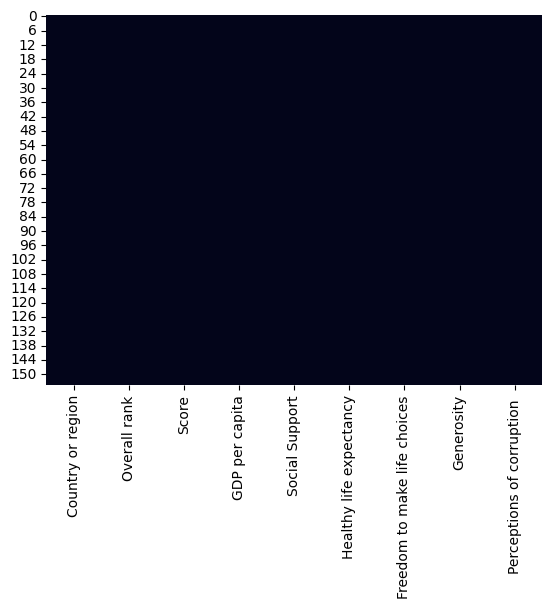

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('DS.csv')
null_values = df.isnull().sum()
print(null_values)
sns.heatmap(df.isnull(), cbar=False)

In [3]:
import pandas as pd
df = pd.read_csv('DS.csv')
data_types = df.dtypes
categorical_columns = []
numerical_columns = []

for column, dtype in data_types.iteritems():
    if dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)
print("Categorical Columns:")
print(categorical_columns)

print("\nNumerical Columns:")
print(numerical_columns)


Categorical Columns:
['Country or region']

Numerical Columns:
['Overall rank', 'Score', 'GDP per capita', 'Social Support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption ']


<ipython-input-3-799fc4758edf>:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, dtype in data_types.iteritems():


# **Elbow Method for Optimal K**

In [5]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
data = pd.read_csv("/content/DS.csv")
data

,Country or region,Overall rank,Score,GDP per capita,Social Support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Norway,1.0,7.537,1.616,1.534,0.797,0.635,0.362,0.316
1,Denmark,2.0,7.522,1.482,1.551,0.793,0.626,0.355,0.401
2,Iceland,3.0,7.504,1.481,1.611,0.834,0.627,0.476,0.154
3,Switzerland,4.0,7.494,1.565,1.517,0.858,0.620,0.291,0.367
4,Finland,5.0,7.469,1.444,1.540,0.809,0.618,0.245,0.383
...,...,...,...,...,...,...,...,...,...
150,Rwanda,151.0,3.471,0.369,0.946,0.326,0.582,0.253,0.455
151,Syria,152.0,3.462,0.777,0.396,0.501,0.082,0.494,0.151
152,Tanzania,153.0,3.349,0.511,1.042,0.365,0.390,0.354,0.066
153,Burundi,154.0,2.905,0.092,0.630,0.152,0.060,0.204,0.084


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

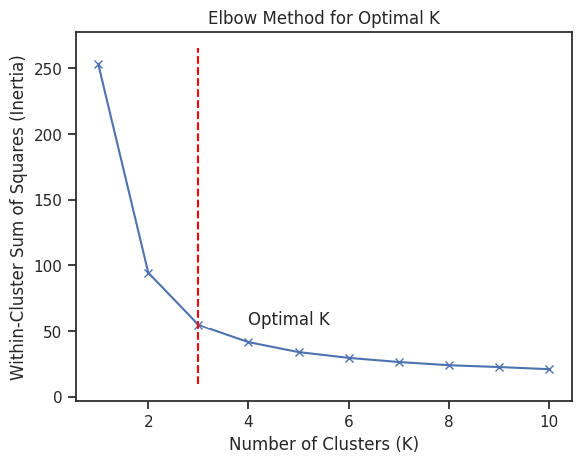

Optimal number of clusters (K): 3


In [20]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares (inertia) for different values of K
inertia = []
K = range(1, 11)  # Range of K values to try

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data[['Score','GDP per capita', 'Social Support', 'Healthy life expectancy', 'Freedom to make life choices',
                     'Generosity', 'Perceptions of corruption ']])
    inertia.append(kmeans.inertia_)

# Use KneeLocator to find the optimal value of K using the elbow method
knee = KneeLocator(K, inertia, curve="convex", direction="decreasing")

# Plot the inertia values and the elbow point
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.vlines(knee.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red')
plt.annotate('Optimal K',
             xy=(knee.knee, inertia[knee.knee-1]),
             xytext=(knee.knee+1, inertia[knee.knee-1]),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.show()

# Print the optimal value of K
print("Optimal number of clusters (K):", knee.knee)


The clustered output depending on the determined "K" value:

In [15]:
from sklearn.cluster import KMeans

# Fit K-Means clustering with the optimal number of clusters (K)
kmeans = KMeans(n_clusters=knee.knee)
kmeans.fit(data[['GDP per capita', 'Social Support', 'Healthy life expectancy', 'Freedom to make life choices',
                 'Generosity', 'Perceptions of corruption ']])

# Add the cluster labels to the DataFrame
data['Cluster'] = kmeans.labels_

# Print the number of data points in each cluster
print(data['Cluster'].value_counts())

# Show the clustered output
print(data[['Country or region', 'Cluster']])


2    63
0    47
1    45
Name: Cluster, dtype: int64
            Country or region  Cluster
0                      Norway        0
1                     Denmark        0
2                     Iceland        0
3                 Switzerland        0
4                     Finland        0
..                        ...      ...
150                    Rwanda        1
151                     Syria        1
152                  Tanzania        1
153                   Burundi        1
154  Central African Republic        1

[155 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# **Hypothesis 1:**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-16-68e718de23ad>:22: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('Cluster').mean()


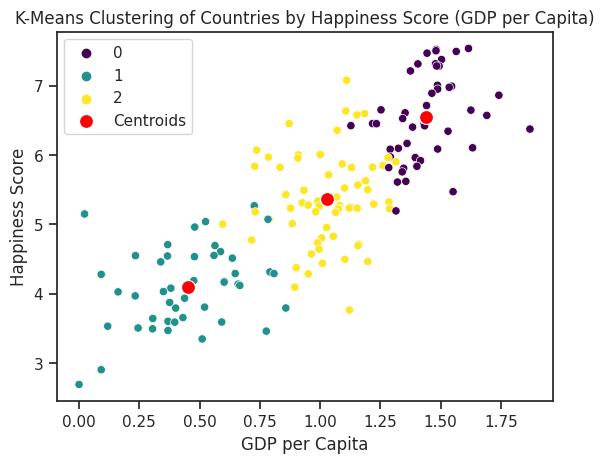

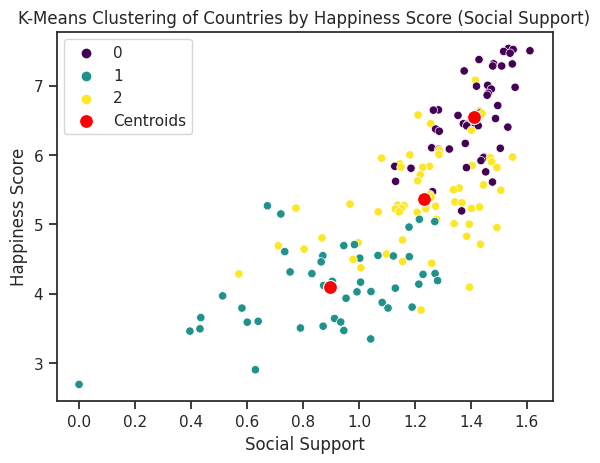

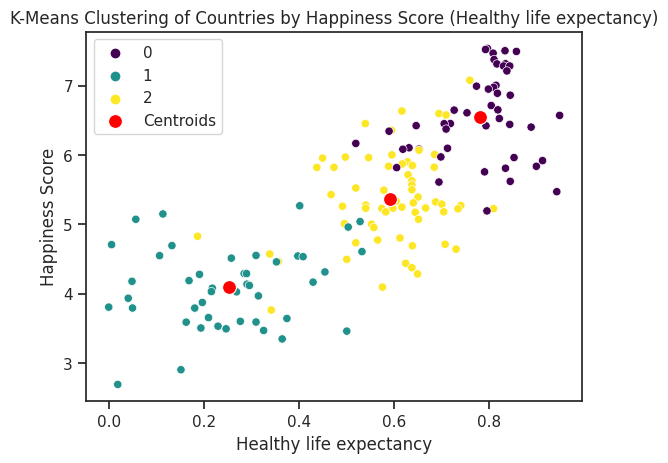

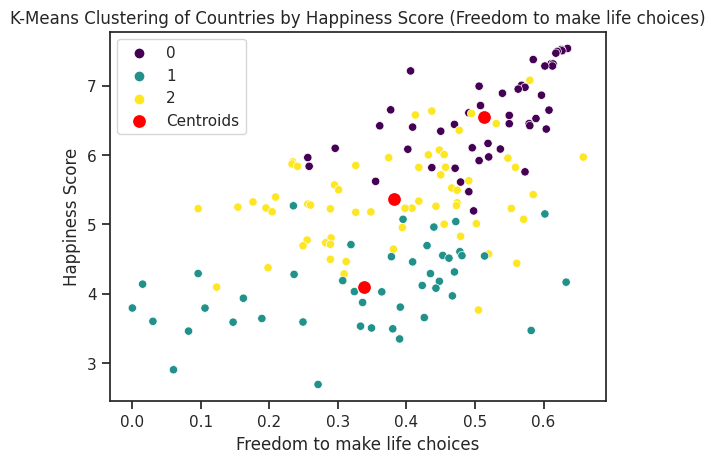

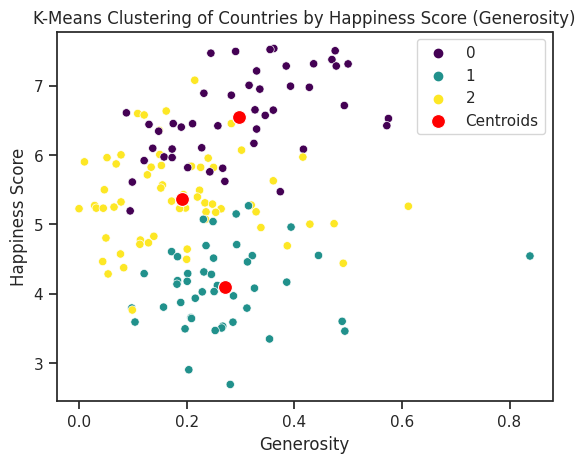

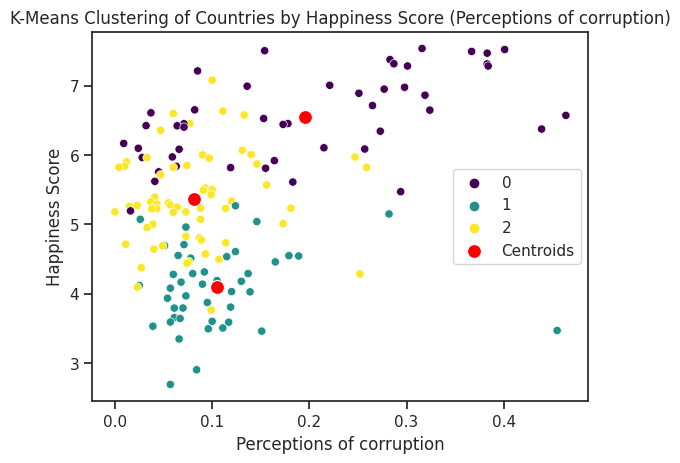

In [16]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset into a DataFrame
data = pd.read_csv('DS.csv')

# Select the relevant columns for clustering
features = data[['GDP per capita', 'Social Support', 'Healthy life expectancy',
                 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption ']]

# Perform K-Means Clustering
k = 3  # Number of clusters to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(features)

# Add the cluster labels to the original DataFrame
data['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_means = data.groupby('Cluster').mean()

# Function to plot the clusters with centroids
def plot_clusters(feature, xlabel):
    plt.figure()
    sns.scatterplot(data=data, x=feature, y='Score', hue='Cluster', palette='viridis')
    sns.scatterplot(data=cluster_means, x=feature, y='Score', marker='o', color='red', s=100, label='Centroids')
    plt.xlabel(xlabel)
    plt.ylabel('Happiness Score')
    plt.title(f'K-Means Clustering of Countries by Happiness Score ({xlabel})')
    plt.legend()
    plt.show()

# Plotting the clusters with centroids for each feature
plot_clusters('GDP per capita', 'GDP per Capita')
plot_clusters('Social Support', 'Social Support')
plot_clusters('Healthy life expectancy', 'Healthy life expectancy')
plot_clusters('Freedom to make life choices', 'Freedom to make life choices')
plot_clusters('Generosity', 'Generosity')
plot_clusters('Perceptions of corruption ', 'Perceptions of corruption')


# Hypothesis 2:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


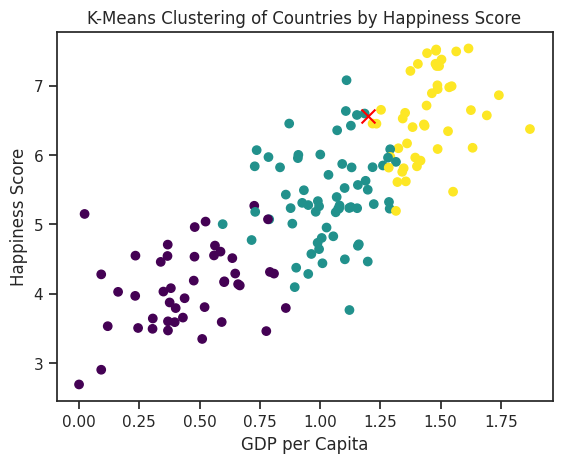

Predicted Happiness Score for the New Country:
6.55662222222222


In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
data = pd.read_csv('DS.csv')

# Select the relevant columns for clustering
features = data[['GDP per capita','Social Support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption ']]

# Perform K-Means Clustering
k = 3  # Number of clusters to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(features)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the 'Cluster' column to the DataFrame
data['Cluster'] = cluster_labels

# Assign the new country's features (example values)
new_country_features = [1.2, 1.4, 0.8, 0.5, 0.2, 0.3]

# Predict the cluster for the new country
new_country_cluster = kmeans.predict([new_country_features])

# Filter the DataFrame by the predicted cluster
predicted_cluster_data = data[data['Cluster'] == new_country_cluster[0]]

# Calculate the average happiness score of the predicted cluster
predicted_happiness_score = predicted_cluster_data['Score'].mean()

# Plotting the clusters and the new country
plt.scatter(data['GDP per capita'], data['Score'], c=data['Cluster'], cmap='viridis')
plt.scatter(new_country_features[0], predicted_happiness_score, marker='x', color='red', s=100)
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.title('K-Means Clustering of Countries by Happiness Score')
plt.show()

# Print the predicted happiness score for the new country
print("Predicted Happiness Score for the New Country:")
print(predicted_happiness_score)


# **Hypothesis 3:**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


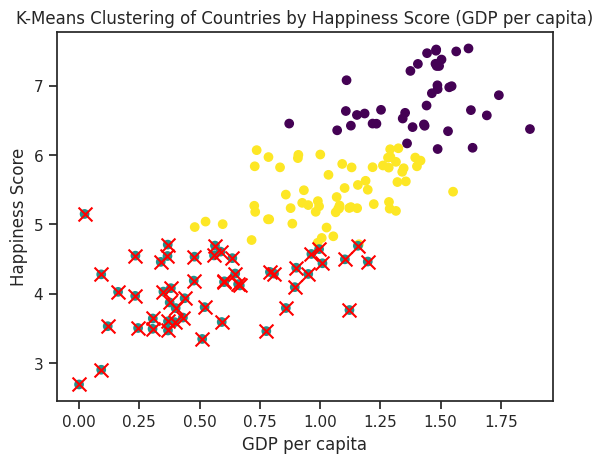

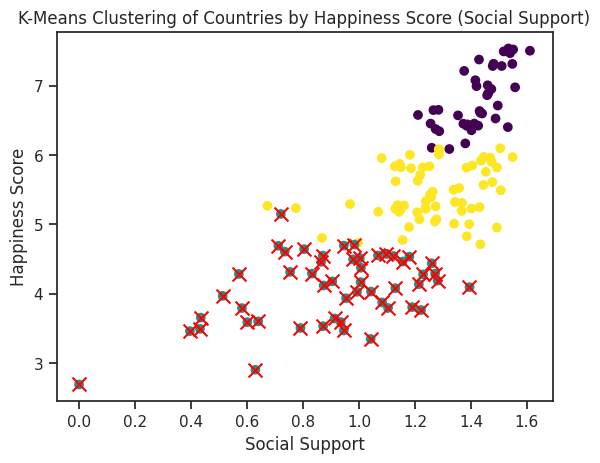

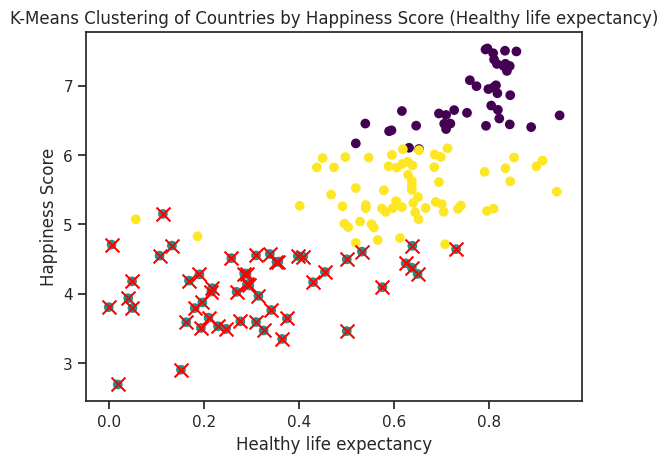

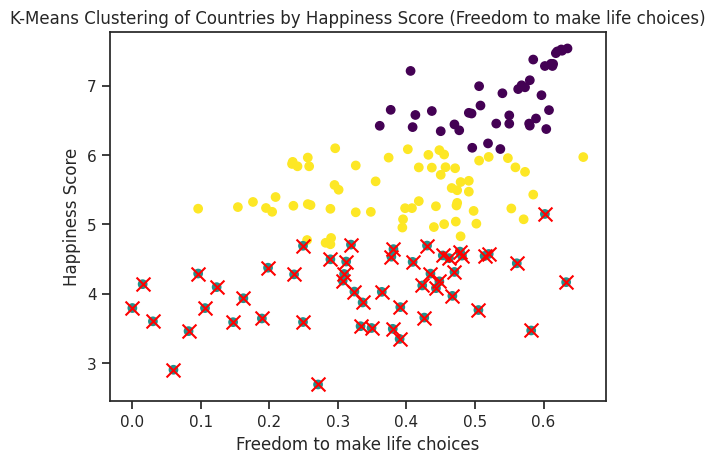

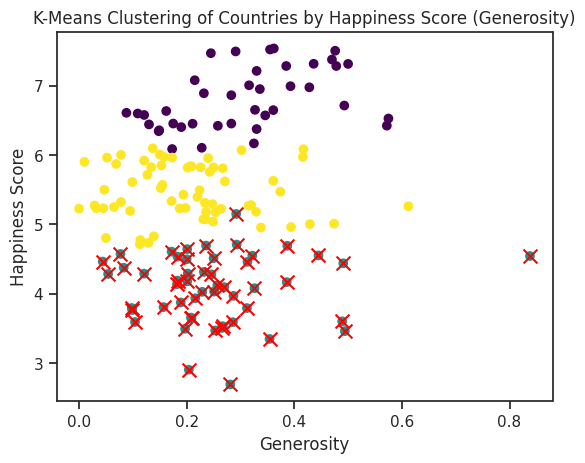

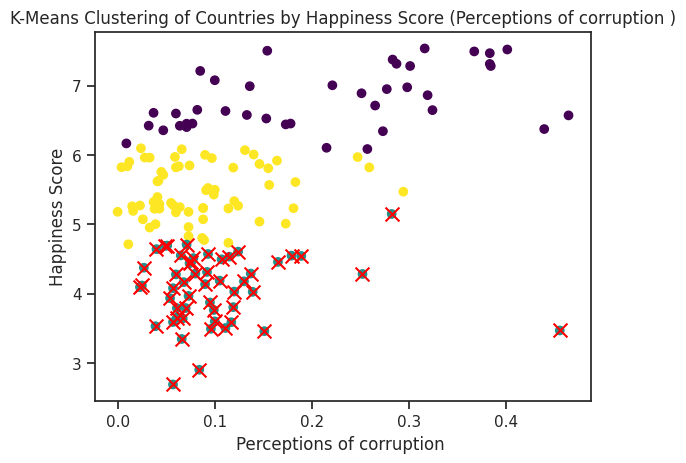

Countries with Significantly Different Happiness Scores and Attributes:
            Country or region  GDP per capita  Social Support  \
92                    Somalia           0.023           0.721   
105              Sierra Leone           0.368           0.984   
106                  Cameroon           0.564           0.946   
107                      Iran           1.157           0.712   
108                   Albania           0.996           0.804   
109                Bangladesh           0.587           0.735   
110                   Namibia           0.964           1.098   
111                     Kenya           0.560           1.068   
112                Mozambique           0.234           0.871   
113                   Myanmar           0.367           1.123   
114                   Senegal           0.479           1.180   
115                    Zambia           0.636           1.003   
116                      Iraq           1.103           0.979   
117               

In [18]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Read the dataset into a DataFrame
data = pd.read_csv('DS.csv')

# Select the relevant columns for clustering
features = data[['GDP per capita', 'Social Support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption ', 'Score']]

# Perform K-Means Clustering
k = 3  # Number of clusters to create
kmeans = KMeans(n_clusters=k)
kmeans.fit(features)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the 'Cluster' column to the DataFrame
data['Cluster'] = cluster_labels

# Find the cluster with the lowest average happiness score
lowest_happiness_cluster = data.groupby('Cluster')['Score'].mean().idxmin()

# Get the countries in the lowest happiness cluster
lowest_happiness_countries = data[data['Cluster'] == lowest_happiness_cluster]

# Function to plot the clusters and countries with lowest happiness scores
def plot_clusters(feature, xlabel):
    plt.figure()
    plt.scatter(data[feature], data['Score'], c=data['Cluster'], cmap='viridis')
    plt.scatter(lowest_happiness_countries[feature], lowest_happiness_countries['Score'],
                marker='x', color='red', s=100)
    plt.xlabel(xlabel)
    plt.ylabel('Happiness Score')
    plt.title(f'K-Means Clustering of Countries by Happiness Score ({xlabel})')
    plt.show()

# Plotting the clusters and countries with lowest happiness scores for each feature
for column in features.columns[:-1]:
    plot_clusters(column, column)

# Print the countries with significantly different happiness scores and attributes
print("Countries with Significantly Different Happiness Scores and Attributes:")
print(lowest_happiness_countries[['Country or region', 'GDP per capita', 'Social Support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity', 'Perceptions of corruption ', 'Score']])
